Import necessary libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

----------------------

Import data

### Brief Explanation of the dataset's abbreviated variables
Attributes related with Eating Habits: <br>
FAVC: Frequent consumption of high caloric food <br>
FCVC: Frequency of consumption of vegetables <br>
NCP: Number of main meals<br>
CAEC: Consumption of food between meals<br>
CH20: Consumption of water daily<br>
CALC: Consumption of alcohol<br>

Class variable NObeyesdad was created based on Equation (Mass Body Index = Weight/height*height) with the values of: <br> Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, 

In [69]:
obesity_data = pd.read_csv("datasets/ObesityDataSet_raw_and_data_sinthetic.csv")
pd.concat([obesity_data.head(), obesity_data.tail()])

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [70]:
cleanedobesity_data = pd.read_csv("datasets/cleaned_eating_habits_data.csv")
pd.concat([cleanedobesity_data.head(), cleanedobesity_data.tail()])

,FAVC,FCVC,NCP,CAEC,CH2O,CALC
0,no,2.0,3.0,Sometimes,2.000000,no
1,no,3.0,3.0,Sometimes,3.000000,Sometimes
2,no,2.0,3.0,Sometimes,2.000000,Frequently
3,no,3.0,3.0,Sometimes,2.000000,Frequently
4,no,2.0,1.0,Sometimes,2.000000,Sometimes
2106,yes,3.0,3.0,Sometimes,1.728139,Sometimes
2107,yes,3.0,3.0,Sometimes,2.005130,Sometimes
2108,yes,3.0,3.0,Sometimes,2.054193,Sometimes
2109,yes,3.0,3.0,Sometimes,2.852339,Sometimes
2110,yes,3.0,3.0,Sometimes,2.863513,Sometimes


In [71]:
#check for missing data
obesity_data.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

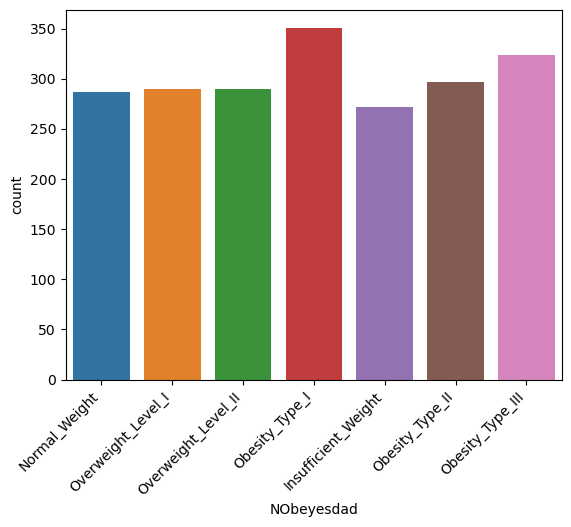

In [72]:
sb.countplot(x='NObeyesdad', data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

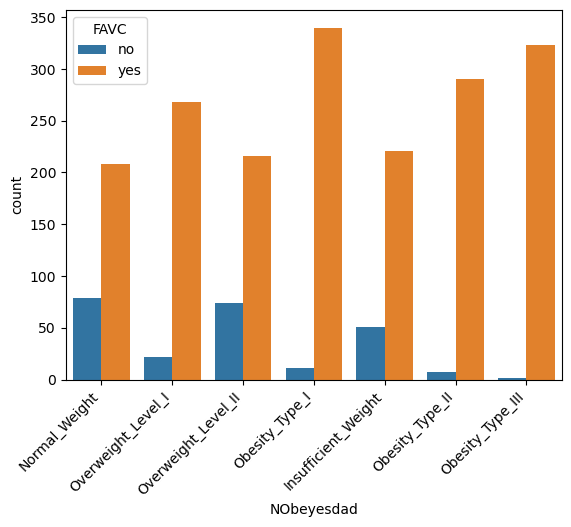

In [73]:
sb.countplot(x='NObeyesdad', hue='FAVC', data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

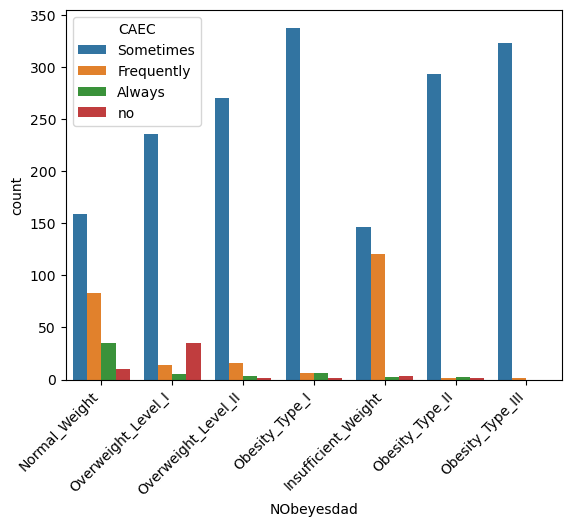

In [74]:
sb.countplot(x='NObeyesdad', hue='CAEC', data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

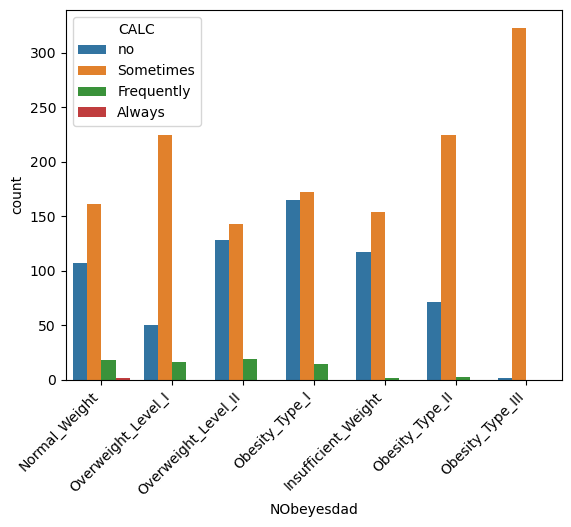

In [75]:
sb.countplot(x='NObeyesdad', hue='CALC', data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

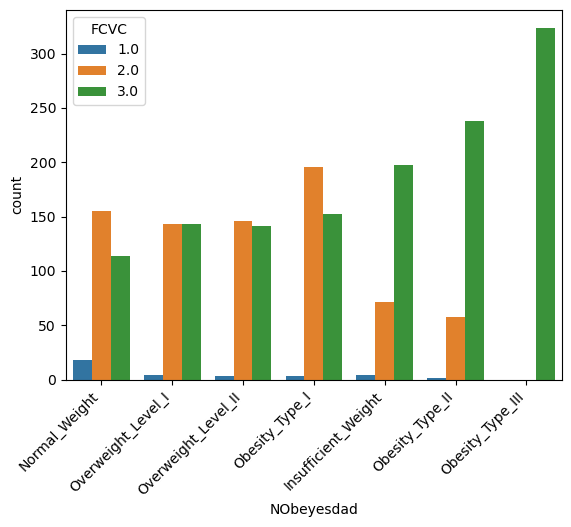

In [76]:
sb.countplot(x='NObeyesdad', hue=obesity_data['FCVC'].apply(np.ceil), data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

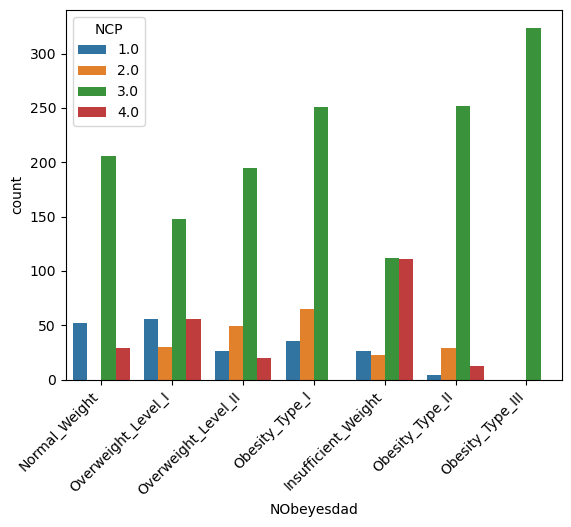

In [77]:
sb.countplot(x='NObeyesdad', hue=obesity_data['NCP'].apply(np.ceil), data=obesity_data)
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

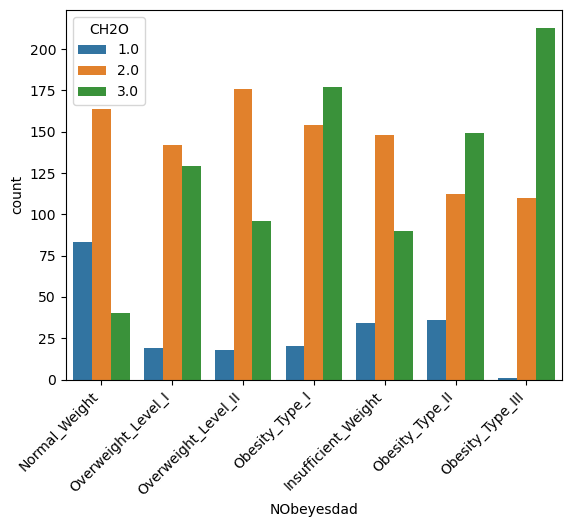

In [78]:
sb.countplot(x='NObeyesdad', hue=obesity_data['CH2O'].apply(np.ceil), data=obesity_data)
plt.xticks(rotation=45, ha='right')

In [79]:
#Cleaning the data
obesity_data.drop(['Gender', 'Age', 'Height','Weight', 'family_history_with_overweight', 'SMOKE', 'SCC','FAF', 'TUE', 'MTRANS'], axis=1, inplace=True)

In [80]:
#view cleaned data
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FAVC        2111 non-null   object 
 1   FCVC        2111 non-null   float64
 2   NCP         2111 non-null   float64
 3   CAEC        2111 non-null   object 
 4   CH2O        2111 non-null   float64
 5   CALC        2111 non-null   object 
 6   NObeyesdad  2111 non-null   object 
dtypes: float64(3), object(4)
memory usage: 115.6+ KB


Changing categorical data into dummies

In [81]:
favc = pd.get_dummies(obesity_data, columns=['FAVC'], drop_first=True)
obesity_data.drop('FAVC',axis=1,inplace=True)
obesity_data = pd.concat([favc], axis=1)

In [82]:
obesity_data.head(10)


,FCVC,NCP,CAEC,CH2O,CALC,NObeyesdad,FAVC_yes
0,2.0,3.0,Sometimes,2.0,no,Normal_Weight,0
1,3.0,3.0,Sometimes,3.0,Sometimes,Normal_Weight,0
2,2.0,3.0,Sometimes,2.0,Frequently,Normal_Weight,0
3,3.0,3.0,Sometimes,2.0,Frequently,Overweight_Level_I,0
4,2.0,1.0,Sometimes,2.0,Sometimes,Overweight_Level_II,0
5,2.0,3.0,Sometimes,2.0,Sometimes,Normal_Weight,1
6,3.0,3.0,Sometimes,2.0,Sometimes,Normal_Weight,1
7,2.0,3.0,Sometimes,2.0,Sometimes,Normal_Weight,0
8,3.0,3.0,Sometimes,2.0,Frequently,Normal_Weight,1
9,2.0,3.0,Sometimes,2.0,no,Normal_Weight,1


In [83]:
caec = pd.get_dummies(obesity_data, columns=['CAEC'], drop_first=True)
obesity_data.drop('CAEC',axis=1,inplace=True)
obesity_data = pd.concat([caec], axis=1)

In [84]:
calc = pd.get_dummies(obesity_data, columns=['CALC'], drop_first=True)
obesity_data.drop('CALC',axis=1,inplace=True)
obesity_data = pd.concat([calc], axis=1)

In [85]:
#nobeyesdad = pd.get_dummies(obesity_data, columns=['NObeyesdad'], drop_first=True)
#obesity_data.drop('NObeyesdad',axis=1,inplace=True)
#obesity_data = pd.concat([nobeyesdad], axis=1)

In [86]:
obesity_data.head(10)

,FCVC,NCP,CH2O,NObeyesdad,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,2.0,3.0,2.0,Normal_Weight,0,0,1,0,0,0,1
1,3.0,3.0,3.0,Normal_Weight,0,0,1,0,0,1,0
2,2.0,3.0,2.0,Normal_Weight,0,0,1,0,1,0,0
3,3.0,3.0,2.0,Overweight_Level_I,0,0,1,0,1,0,0
4,2.0,1.0,2.0,Overweight_Level_II,0,0,1,0,0,1,0
5,2.0,3.0,2.0,Normal_Weight,1,0,1,0,0,1,0
6,3.0,3.0,2.0,Normal_Weight,1,0,1,0,0,1,0
7,2.0,3.0,2.0,Normal_Weight,0,0,1,0,0,1,0
8,3.0,3.0,2.0,Normal_Weight,1,0,1,0,1,0,0
9,2.0,3.0,2.0,Normal_Weight,1,0,1,0,0,0,1


In [87]:
obesity_data

,FCVC,NCP,CH2O,NObeyesdad,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,2.0,3.0,2.000000,Normal_Weight,0,0,1,0,0,0,1
1,3.0,3.0,3.000000,Normal_Weight,0,0,1,0,0,1,0
2,2.0,3.0,2.000000,Normal_Weight,0,0,1,0,1,0,0
3,3.0,3.0,2.000000,Overweight_Level_I,0,0,1,0,1,0,0
4,2.0,1.0,2.000000,Overweight_Level_II,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2106,3.0,3.0,1.728139,Obesity_Type_III,1,0,1,0,0,1,0
2107,3.0,3.0,2.005130,Obesity_Type_III,1,0,1,0,0,1,0
2108,3.0,3.0,2.054193,Obesity_Type_III,1,0,1,0,0,1,0
2109,3.0,3.0,2.852339,Obesity_Type_III,1,0,1,0,0,1,0


Splitting data into independent(X) [predictor] and dependent(Y) [response] variables

In [100]:
X = obesity_data.loc[:, ['FCVC', 'NCP','CH2O', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no']] #
y = obesity_data.loc[:,'NObeyesdad'] # 

In [101]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.7850187 ,  0.40415272, -0.01307326, ..., -0.18519426,
        -1.40472041,  1.5177613 ],
       [ 1.08834176,  0.40415272,  1.61875854, ..., -0.18519426,
         0.71188543, -0.65886513],
       [-0.7850187 ,  0.40415272, -0.01307326, ...,  5.39973544,
        -1.40472041, -0.65886513],
       ...,
       [ 1.08834176,  0.40415272,  0.0753606 , ..., -0.18519426,
         0.71188543, -0.65886513],
       [ 1.08834176,  0.40415272,  1.37780063, ..., -0.18519426,
         0.71188543, -0.65886513],
       [ 1.08834176,  0.40415272,  1.39603472, ..., -0.18519426,
         0.71188543, -0.65886513]])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1477, 10)
(634, 10)
(1477,)
(634,)


In [103]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [104]:
y_pred = classifier.predict(X_test)

In [105]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
553,Insufficient_Weight,Obesity_Type_II
331,Normal_Weight,Obesity_Type_I
241,Overweight_Level_I,Obesity_Type_II
1957,Obesity_Type_III,Obesity_Type_III
1691,Obesity_Type_II,Obesity_Type_II
...,...,...
1012,Overweight_Level_II,Overweight_Level_II
340,Normal_Weight,Obesity_Type_II
2005,Obesity_Type_III,Obesity_Type_III
1671,Obesity_Type_II,Obesity_Type_II


In [106]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[35, 11, 20, 14,  7,  3,  2],
       [21, 17, 12, 12,  3,  2, 10],
       [ 1,  6, 66, 25,  9,  2,  5],
       [ 0,  2, 24, 52,  7,  0,  0],
       [ 0,  0,  0,  0, 91,  0,  1],
       [ 5,  6, 21, 28,  5, 15,  9],
       [ 4,  3, 45,  9,  1,  3, 20]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

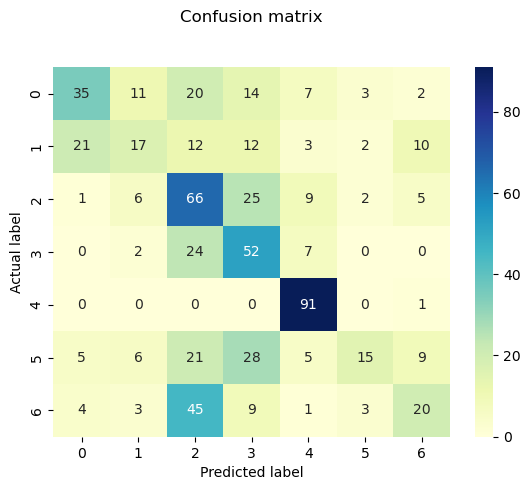

In [108]:
sb.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [110]:
accuracy_score(y_test,y_pred)

0.4668769716088328

------------
TESTING IN PROGRESS:


THIS IS THE ARCHIVE CODES

In [88]:
traindata = obesity_data.sample(frac=1, random_state =42)
n = traindata.shape[0]
train_size = int(n * 0.8)
train_data = traindata.iloc[:train_size]
test_data = traindata.iloc[train_size:]

Train datasets:

In [89]:
X_train = train_data.loc[:, ['FCVC', 'NCP','CH2O', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no']] #
y_train = train_data.loc[:,'NObeyesdad'] # 
#y_train = train_data.loc[:, ['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I','NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']] 


Test datasets:

In [90]:
X_test = test_data.loc[:, ['FCVC', 'NCP','CH2O', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no']] #
y_test = test_data.loc[:,'NObeyesdad'] #
#y_test = test_data.loc[:, ['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I','NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']] 


In [91]:
# Check the sample sizes
print("Train Set :", "X:",X_train.shape, "y:", y_train.shape)
print("Test Set  :", "X:", X_test.shape, "y:", y_test.shape)


Train Set : X: (1688, 10) y: (1688,)
Test Set  : X: (423, 10) y: (423,)


In [92]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\n2_el\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

TESTING

In [93]:
#X_train = train_data.loc[:, ['FCVC', 'NCP','CH2O', 'FAVC', 'CAEC', 'CALC']] # 
#y_train = train_data.loc[:,'NObeyesdad'] # 

In [94]:
#X_test = test_data.loc[:, ['FCVC', 'NCP','CH2O', 'FAVC', 'CAEC', 'CALC']] # 
#y_test = test_data.loc[:,'NObeyesdad'] # 

In [95]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [96]:
#traindata= obesity_data
#traindata

In [97]:
#train_data

In [98]:
#test_data